# Correlation between age and allergies

Data was generated using https://github.com/synthetichealth/synthea
Load it:

In [1]:
import pandas as pd

pacients = pd.read_csv("../data/output1000/patients.csv", encoding="ISO-8859-1")
allergies = pd.read_csv("../data/output1000/allergies.csv")

In [2]:
pacients.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,ZIP
0,b186a623-3d54-4bac-971d-f49c115b89d5,2011-11-20,NaN,999-42-1278,NaN,NaN,NaN,Ola364,Nicolas769,NaN,NaN,NaN,white,irish,F,Boston Massachusetts US,746 Macejkovic Gardens,West Bridgewater,Massachusetts,2379.0
1,ba8d73a2-10bc-4c24-9830-8283afae3ac0,1993-07-25,NaN,999-18-2283,S99990985,X29181576X,Mr.,Rubin812,Miller503,NaN,NaN,NaN,white,english,M,Waltham Massachusetts US,749 Gutkowski Overpass,Fall River,Massachusetts,2720.0
2,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,999-41-4861,NaN,NaN,NaN,Esperanza675,Moya426,NaN,NaN,NaN,hispanic,puerto_rican,F,Ponce Puerto Rico PR,959 Ruecker Crossing,Somerville,Massachusetts,2138.0
3,b182645e-7ca0-4c75-b42b-644919fd2cc4,1966-06-28,NaN,999-90-5732,S99964068,X35323316X,Mrs.,Halley419,Lang846,NaN,Ratke343,M,asian,chinese,F,Chongqing Chongqing Municipality CN,951 Beier Trafficway Apt 3,Peabody,Massachusetts,1940.0
4,8e54772b-7510-4de0-8466-7c10722e73d3,1972-04-03,NaN,999-39-3195,S99972514,X11117975X,Mr.,Luther918,Bahringer146,NaN,NaN,M,white,english,M,Everett Massachusetts US,158 Boyle Meadow Suite 62,Fall River,Massachusetts,2720.0


In [3]:
allergies.head()


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2007-05-01,NaN,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,b3f2ed22-68e1-4e20-940e-583d245cbf48,424213003,Allergy to bee venom
1,1976-01-24,NaN,23a4bbe4-4ed0-4bef-b626-f07ea6a411e3,c571e5a8-6deb-41ef-a3d7-ea477411ee7b,419474003,Allergy to mould
2,1976-01-24,NaN,23a4bbe4-4ed0-4bef-b626-f07ea6a411e3,c571e5a8-6deb-41ef-a3d7-ea477411ee7b,232350006,House dust mite allergy
3,1976-01-24,NaN,23a4bbe4-4ed0-4bef-b626-f07ea6a411e3,c571e5a8-6deb-41ef-a3d7-ea477411ee7b,232347008,Dander (animal) allergy
4,1976-01-24,NaN,23a4bbe4-4ed0-4bef-b626-f07ea6a411e3,c571e5a8-6deb-41ef-a3d7-ea477411ee7b,419263009,Allergy to tree pollen


Join `allergies.tsv` and `pacients.tsv` based on the ID

In [4]:
data_raw = pd.merge(pacients, allergies, left_on='Id', right_on='PATIENT').get(['Id', 'BIRTHDATE', 'DEATHDATE', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'CITY', 'CODE', 'DESCRIPTION', 'START', 'STOP'])
data_raw.head()

,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,CODE,DESCRIPTION,START,STOP
0,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,424213003,Allergy to bee venom,2007-05-01,NaN
1,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,419474003,Allergy to mould,2007-05-01,NaN
2,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,232350006,House dust mite allergy,2007-05-01,NaN
3,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,232347008,Dander (animal) allergy,2007-05-01,NaN
4,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,418689008,Allergy to grass pollen,2007-05-01,NaN


Parse birthday year and allergy start date year

In [5]:
data_raw['BIRTHDATE_YEAR'] = data_raw['BIRTHDATE'].apply(lambda x: int(x[:4]))
data_raw['START_YEAR'] = data_raw['START'].apply(lambda x: int(x[:4]))
data_raw.head()

,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,CODE,DESCRIPTION,START,STOP,BIRTHDATE_YEAR,START_YEAR
0,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,424213003,Allergy to bee venom,2007-05-01,NaN,2006,2007
1,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,419474003,Allergy to mould,2007-05-01,NaN,2006,2007
2,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,232350006,House dust mite allergy,2007-05-01,NaN,2006,2007
3,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,232347008,Dander (animal) allergy,2007-05-01,NaN,2006,2007
4,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,418689008,Allergy to grass pollen,2007-05-01,NaN,2006,2007


Compute correlation between the data variables

In [6]:
data_raw.corr()

,CODE,BIRTHDATE_YEAR,START_YEAR
CODE,1.000000,0.102440,0.107737
BIRTHDATE_YEAR,0.102440,1.000000,0.991835
START_YEAR,0.107737,0.991835,1.000000


We can see that there is high correlation between the year of birth and year of the start date of the allergies, let us plot the data distribution of these two variables.

In [7]:
data_raw['START_YEAR'].value_counts().hist(bins = 20)

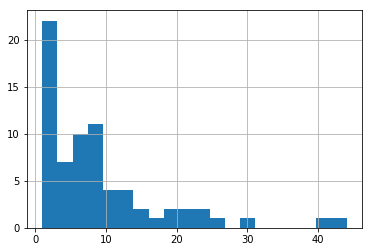

In [8]:
data_raw['BIRTHDATE_YEAR'].value_counts().hist(bins = 20)

Compute the number of months when people started having allergies

In [9]:
def month_difference(lower, upper):
  months_upper = int(upper[:4])*12 + int(upper[5:7])
  months_lower = int(lower[:4])*12 + int(lower[5:7])
  return months_upper - months_lower

data_raw['MONTHS_ALLERGY_START'] = data_raw[['START','BIRTHDATE']].apply(lambda x: month_difference(x['BIRTHDATE'], x['START']), axis = 1)
data_raw.head()

,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,CODE,DESCRIPTION,START,STOP,BIRTHDATE_YEAR,START_YEAR,MONTHS_ALLERGY_START
0,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,424213003,Allergy to bee venom,2007-05-01,NaN,2006,2007,14
1,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,419474003,Allergy to mould,2007-05-01,NaN,2006,2007,14
2,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,232350006,House dust mite allergy,2007-05-01,NaN,2006,2007,14
3,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,232347008,Dander (animal) allergy,2007-05-01,NaN,2006,2007,14
4,65c656cd-a7a5-4a0e-8bb2-9272ee9df713,2006-03-25,NaN,NaN,hispanic,puerto_rican,F,Somerville,418689008,Allergy to grass pollen,2007-05-01,NaN,2006,2007,14


Plot the frequency of the months of allergy start

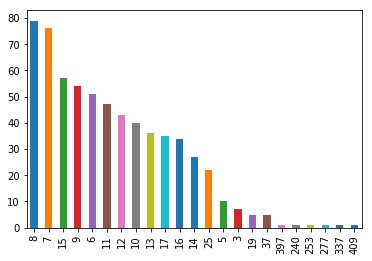

In [10]:
data_raw['MONTHS_ALLERGY_START'].value_counts().plot(kind='bar')

Plot the distribution of the data

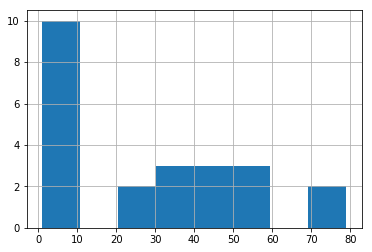

In [11]:
data_raw['MONTHS_ALLERGY_START'].value_counts().hist(bins = 8)

We can see that most of the cases of allegies started in the first 12 months, this is an impotant information for health care system/parents to take special care of babies in these months

In [12]:
data_raw_M = data_raw[data_raw['GENDER'] == 'M']

In [13]:
data_raw_F = data_raw[data_raw['GENDER'] == 'F']

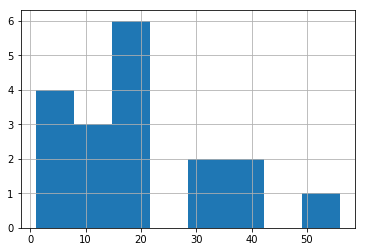

In [14]:
data_raw_F['MONTHS_ALLERGY_START'].value_counts().hist(bins = 8)

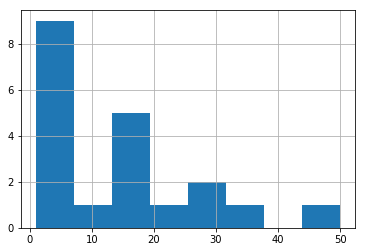

In [15]:
data_raw_M['MONTHS_ALLERGY_START'].value_counts().hist(bins = 8)

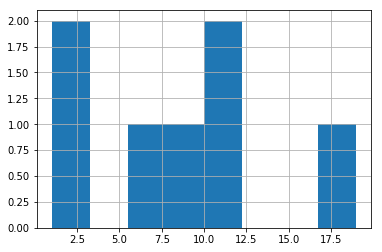

In [16]:
data_raw_1 = data_raw[data_raw['ETHNICITY'] == 'puerto_rican']
data_raw_1['MONTHS_ALLERGY_START'].value_counts().hist(bins = 8)

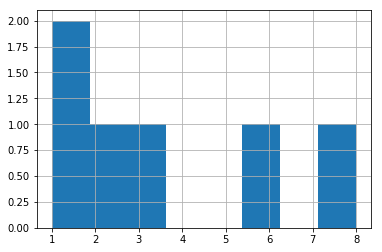

In [17]:
data_raw_2 = data_raw[data_raw['ETHNICITY'] == 'french']
data_raw_2['MONTHS_ALLERGY_START'].value_counts().hist(bins = 8)